<a href="https://colab.research.google.com/github/iamlokki/Twitter_Sentiment_Analysis/blob/main/Sentiment%20Analysis%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import re    # for regular expressions
import nltk  # for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving test_tweets_anuFYb8.csv to test_tweets_anuFYb8.csv
Saving train_E6oV3lV.csv to train_E6oV3lV.csv


In [22]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')
train

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [23]:
combi = pd.concat([train, test], ignore_index=True)
combi

id  label                                              tweet
0          1    0.0   @user when a father is dysfunctional and is s...
1          2    0.0  @user @user thanks for #lyft credit i can't us...
2          3    0.0                                bihday your majesty
3          4    0.0  #model   i love u take with u all the time in ...
4          5    0.0             factsguide: society now    #motivation
...      ...    ...                                                ...
49154  49155    NaN  thought factory: left-right polarisation! #tru...
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...
49157  49158    NaN  happy, at work conference: right mindset leads...
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...

[49159 rows x 3 columns]

In [24]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [25]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   

                                          tidy_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can't use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

In [26]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

<ipython-input-26-acd2d472f377>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   
5   6    0.0  [2/2] huge fan fare and big talking before the...   
6   7    0.0   @user camping tomorrow @user @user @user @use...   
7   8    0.0  the next school year is the year for exams.ð...   
8   9    0.0  we won!!! love the land!!! #allin #cavs #champ...   
9  10    0.0   @user @user welcome here !  i'm   it's so #gr...   

                                          tidy_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can t use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide  society now    #motivation  
5        huge fan fare and big talking before the...  
6                   camping tomorrow        danny     
7  the next school year is the year for exams    ...  
8  we won    love the land    #allin #cavs #champ...  
9              welcome here    i m   it s so #gr

In [27]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head(10)

id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   
5   6    0.0  [2/2] huge fan fare and big talking before the...   
6   7    0.0   @user camping tomorrow @user @user @user @use...   
7   8    0.0  the next school year is the year for exams.ð...   
8   9    0.0  we won!!! love the land!!! #allin #cavs #champ...   
9  10    0.0   @user @user welcome here !  i'm   it's so #gr...   

                                          tidy_tweet  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit cause they offer wheelchai...  
2                                bihday your majesty  
3                         #model love take with time  
4                     factsguide society #motivation  
5  huge fare talking before they leave chaos disp...  
6                             camping tomorrow danny  
7  next school year year exams think about that #...  
8  love land #allin #cavs #champions #cleveland #...  
9                                       welcome here

In [28]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, used, wo...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: tidy_tweet, Length: 49159, dtype: object

In [29]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
49154    [thought, factori, left, right, polaris, #trum...
49155    [feel, like, mermaid, #hairflip, #neverreadi, ...
49156    [#hillari, #campaign, today, #ohio, use, word,...
49157    [happi, work, confer, right, mindset, lead, cu...
49158    [song, glad, free, download, #shoegaz, #newmus...
Name: tidy_tweet, Length: 49159, dtype: object

In [30]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet
combi.head()

id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   

                                          tidy_tweet  
0  when father dysfunct selfish drag kid into dys...  
1  thank #lyft credit caus they offer wheelchair ...  
2                                bihday your majesti  
3                         #model love take with time  
4                           factsguid societi #motiv

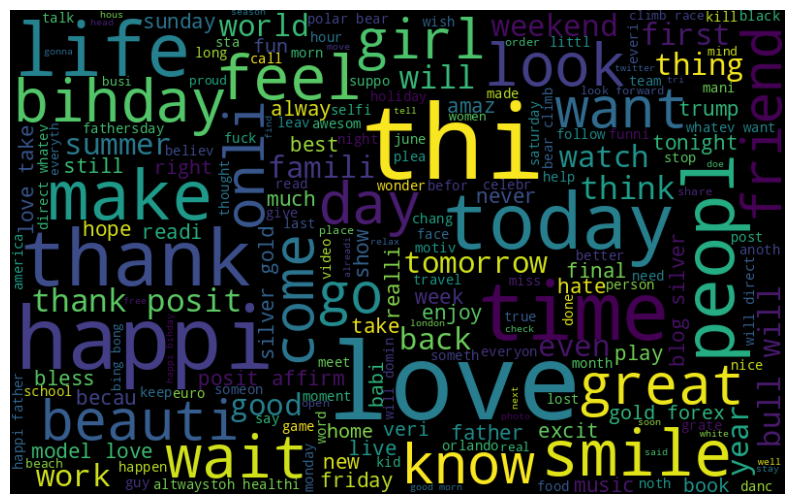

In [31]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [32]:
all_words

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

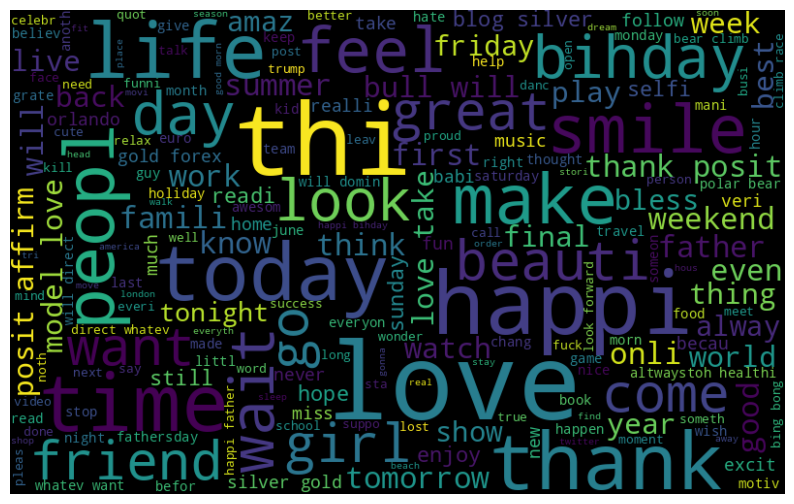

In [33]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

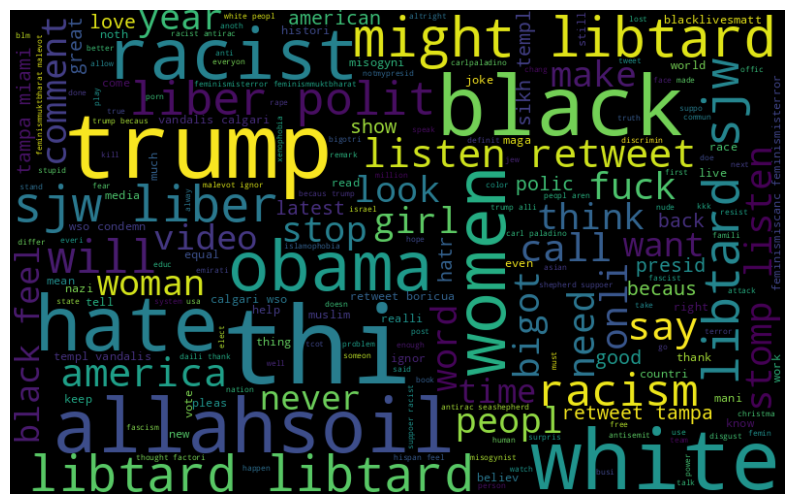

In [34]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
  return hashtags

In [36]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])
HT_regular

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [37]:
HT_negative=hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])
HT_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [38]:
HT_regular = sum(HT_regular,[])
HT_regular

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [39]:
HT_negative = sum(HT_negative,[])

In [40]:
a = nltk.FreqDist(HT_regular)
a

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [41]:
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d

Hashtag  Count
0                 run     72
1                lyft      2
2           disapoint      1
3            getthank      2
4               model    375
...               ...    ...
19490            kamp      1
19491            ucsd      1
19492  berlincitygirl      1
19493            genf      1
19494            bern      1

[19495 rows x 2 columns]

In [42]:
d = d.nlargest(columns="Count", n = 20)
d

Hashtag  Count
32         love   1654
39        posit    917
58        smile    676
157     healthi    573
38        thank    534
176         fun    463
343        life    425
92       affirm    423
286      summer    390
4         model    375
355        cute    367
400      beauti    365
315       happi    358
20         blog    356
223      friend    343
455  fathersday    341
22         gold    301
108         day    301
21       silver    300
156  altwaystoh    295

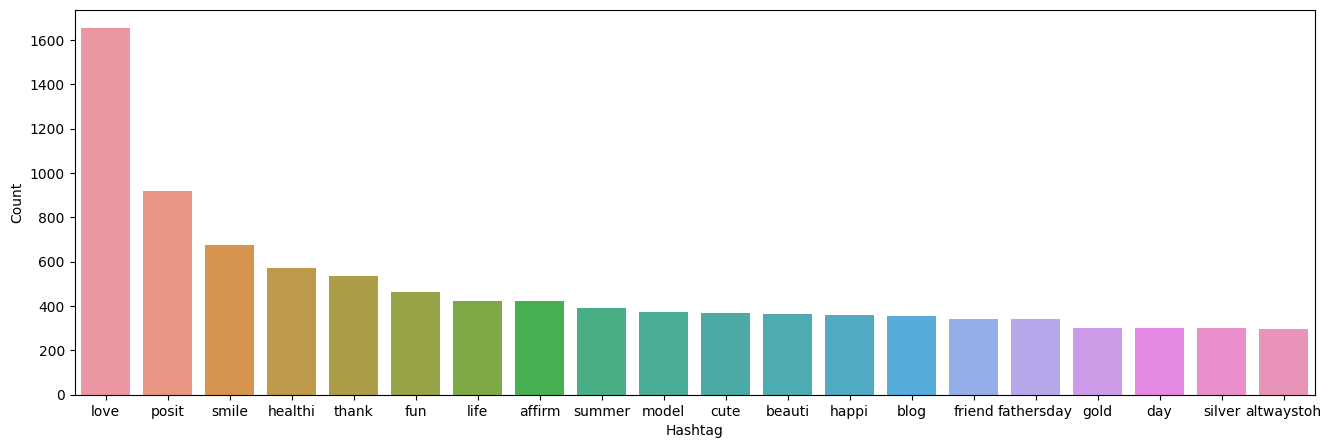

In [43]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

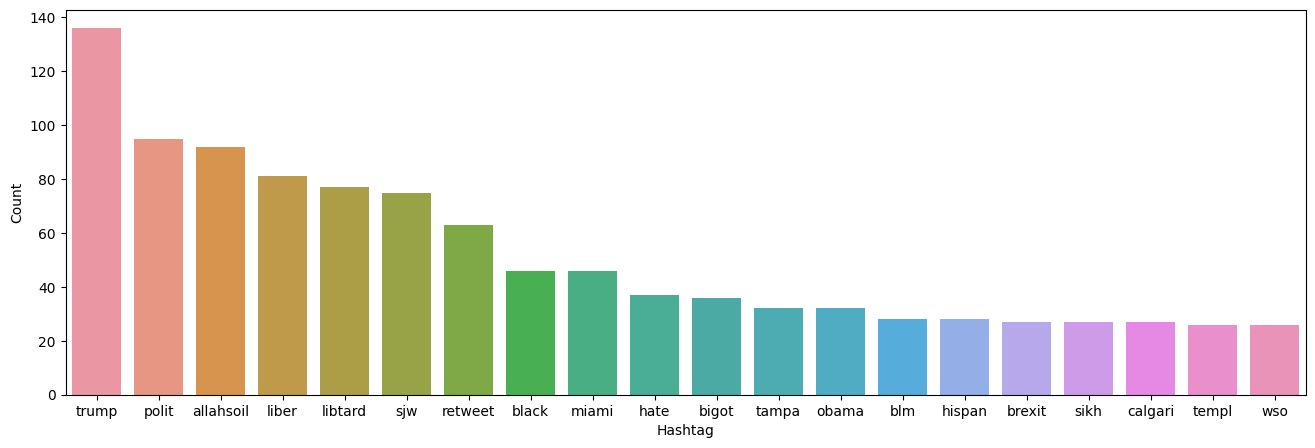

In [44]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),'Count': list(b.values())})
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
plt.show()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'combi' is your combined DataFrame with the 'label' column
combi = combi.dropna(subset=['label'])  # Drop rows with NaN values in 'label' column

X = combi['tidy_tweet']  # Assuming 'tidy_tweet' is the column containing preprocessed text
y = combi['label']       # Assuming 'label' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Create and train a logistic regression model
lreg = LogisticRegression()
lreg.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = lreg.predict(X_test_bow)

#Calculating and Printing Accuracy, Precision, Recal, F1 Score and Confusion Matrix
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recal:", metrics.recall_score(y_test, y_pred))
print("F_score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.9452526200531832
Precision: 0.7366071428571429
Recal: 0.3618421052631579
F_score: 0.4852941176470589
Confusion Matrix: [[5878   59]
 [ 291  165]]


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'combi' is your combined DataFrame with the 'label' column
combi = combi.dropna(subset=['label'])  # Drop rows with NaN values in 'label' column

X = combi['tidy_tweet']  # Assuming 'tidy_tweet' is the column containing preprocessed text
y = combi['label']       # Assuming 'label' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data to numerical features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Create and train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)
knn.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_bow)

#Calculating and Printing Accuracy, Precision, Recal, F1 Score and Confusion Matrix
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recal:", metrics.recall_score(y_test, y_pred))
print("F_score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.9413420929141249
Precision: 0.7076923076923077
Recal: 0.3026315789473684
F_score: 0.423963133640553
Confusion Matrix: [[5880   57]
 [ 318  138]]


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'combi' is your combined DataFrame with the 'label' column
combi = combi.dropna(subset=['label'])  # Drop rows with NaN values in 'label' column

X = combi['tidy_tweet']  # Assuming 'tidy_tweet' is the column containing preprocessed text
y = combi['label']       # Assuming 'label' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data to numerical features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Create and train an SVM model
svm_model = SVC(kernel='linear')  # You can adjust the kernel type and other hyperparameters
svm_model.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_bow)

#Calculating and Printing Accuracy, Precision, Recal, F1 Score and Confusion Matrix
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recal:", metrics.recall_score(y_test, y_pred))
print("F_score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.9446269357109338
Precision: 0.7339449541284404
Recal: 0.3508771929824561
F_score: 0.47477744807121663
Confusion Matrix: [[5879   58]
 [ 296  160]]


In [50]:
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Create and train a Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test_bow)

# Calculating and Printing Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.9357109338338808
Precision: 0.5529411764705883
Recall: 0.5153508771929824
F1 Score: 0.5334846765039728
Confusion Matrix: [[5747  190]
 [ 221  235]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming 'combi' is your combined DataFrame with the 'label' column
combi = combi.dropna(subset=['label'])  # Drop rows with NaN values in 'label' column

X = combi['tidy_tweet']  # Assuming 'tidy_tweet' is the column containing preprocessed text
y = combi['label']       # Assuming 'label' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Create and train a Decision Tree model
dt_model = DecisionTreeClassifier()  # You can adjust other hyperparameters if needed
dt_model.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_bow)

# Calculating and Printing Accuracy, Precision, Recall, F1 Score, and Confusion Matrix
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F_score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.9286719849835758
Precision: 0.5
Recall: 0.5131578947368421
F_score: 0.5064935064935066
Confusion Matrix: [[5703  234]
 [ 222  234]]
